In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
tweets = pd.read_csv('../raw_data/TheBridge_Tech_Tweets.csv')

In [4]:
tweets['tweet_date'] = pd.to_datetime(pd.to_datetime(tweets['tweet_date']).dt.date)

In [5]:
tweets['month'] = tweets['tweet_date'].dt.strftime('%b')

In [6]:
tweets['tweet_event'] = True

In [7]:
tweets.head()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,month,tweet_event
0,1611338908196913153,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-01-06,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,0,0,2,0,Jan,True
1,1610652818234347521,¿Te interesa el diseño de #producto digital? V...,2023-01-04,10279282,Jesús Pérez Serna,mkpositivo,2,0,3,0,Jan,True
2,1610606391445815297,¡Empezamos el año con una #masterclass de #uxu...,2023-01-04,2402179123,Jorge González Revilla,jorgegrev,2,0,3,0,Jan,True
3,1610581093119365121,¿Te planteas un futuro como diseñador #uxui?🎨\...,2023-01-04,1162694149956603904,The Bridge,TheBridge_Tech,3,0,4,0,Jan,True
4,1610236180309868544,"Echa un👀a la historia de Verónica, alumni del ...",2023-01-03,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0,Jan,True


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       175 non-null    int64         
 1   tweet_text     175 non-null    object        
 2   tweet_date     175 non-null    datetime64[ns]
 3   user_id        175 non-null    int64         
 4   user_name      175 non-null    object        
 5   user_username  175 non-null    object        
 6   tweet_retweet  175 non-null    int64         
 7   tweet_reply    175 non-null    int64         
 8   tweet_like     175 non-null    int64         
 9   tweet_quote    175 non-null    int64         
 10  month          175 non-null    object        
 11  tweet_event    175 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(6), object(4)
memory usage: 15.3+ KB


In [9]:
tweets = tweets.sort_values(by = 'tweet_date')

# Here will explore a few buisiness questions relating to the tweets using the @TheBridge_Tech handle

### Which tweet had the largest social impact?

In [10]:
tweets['Total_Social_Impact'] = tweets[['tweet_retweet', 'tweet_reply', 'tweet_like', 'tweet_quote']].sum(axis = 1)

In [11]:
high_impact_tweets = tweets.sort_values(by = 'Total_Social_Impact', ascending = False)[:5][['user_username', 'tweet_retweet', 'tweet_reply', 'tweet_like', 'tweet_quote']]

In [12]:
high_impact_tweets

,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote
160,nodosenlared,49,7,321,4
153,Recuenco,5,2,35,1
85,decentralized_b,11,2,21,1
159,nodosenlared,5,1,10,0
91,42UrdulizFTef,5,1,10,0


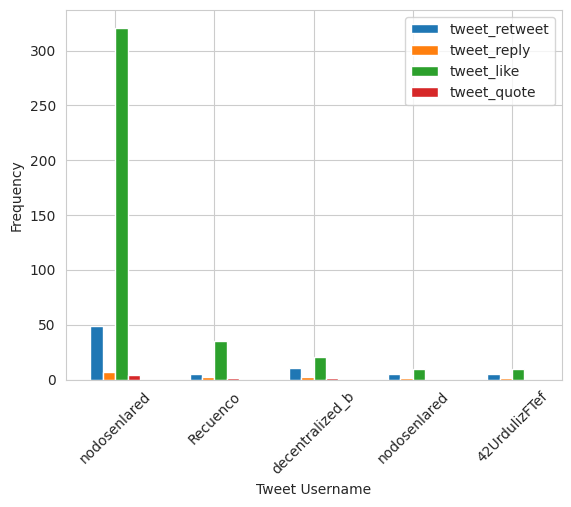

In [13]:
high_impact_tweets.plot(kind = 'bar', x = 'user_username')
plt.xticks(rotation = 45)
plt.xlabel("Tweet Username")
plt.ylabel("Frequency");

In [35]:
tweets.sort_values(by = 'tweet_like', ascending = False).head(1)

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,month,tweet_event,Total_Social_Impact,month_num
160,1614612463361695747,"Advanced #Cynefin, Estuarine mapping &amp; EUF...",2023-01-15,41545659,Mario Lopez de Avila,nodosenlared,49,7,321,4,Jan,True,381,3


In [34]:
tweets.sort_values(by = 'tweet_like', ascending = False).head(1)['tweet_text'].values

array(['Advanced #Cynefin, Estuarine mapping &amp; EUFG Masterclass (Madrid) https://t.co/H5ZSjbKHAr | Los interesados en la aplicación de las ciencias de la complejidad en nuestro país tendremos la oportunidad de aprender de @snowded en persona el 16/3/23 en la sede de @TheBridge_Tech https://t.co/LavCfgYIht'],
      dtype=object)

#### The tweet by nodosenlared, on 15th Jan had by far the greatest social impact recieving >300 likes and 49 retweets. The tweet with the second highest social impact only managed 5 retweets

## Which user mentioned the school the most?

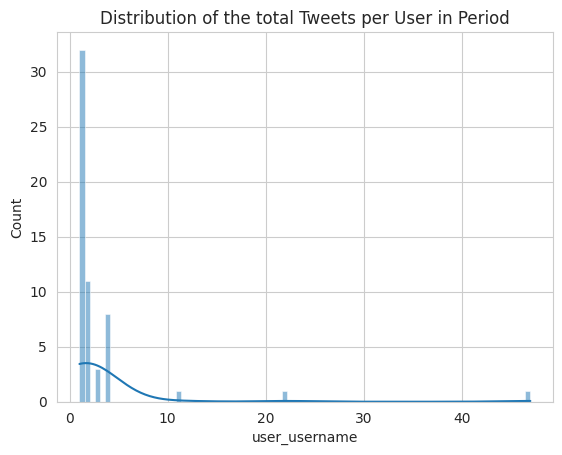

In [14]:
sns.histplot(tweets['user_username'].value_counts(), kde = True)
plt.title("Distribution of the total Tweets per User in Period");

#### The majority of the tweets come from users that only tweeted once mentioning The Bridge. There are only 4 users who tweeted more than 4 times, which we will analyze

In [15]:
top_mentions = tweets['user_username'].value_counts()[tweets['user_username'].value_counts() > 4]

In [16]:
top_mentions = tweets[tweets['user_username'].isin(top_mentions.index)].sort_values(by = 'tweet_date')

In [17]:
top_mentions.head()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,month,tweet_event,Total_Social_Impact
72,1594964278238654471,"Aprende hoy las profesiones del futuro, ¡inscr...",2022-11-22,702077405045899264,Fundación BBK | Obra Social,BBK_eus,2,0,2,0,Nov,True,4
69,1594975696614526979,@HoplaSoftware Deseando teneros @HoplaSoftware...,2022-11-22,1162694149956603904,The Bridge,TheBridge_Tech,0,0,1,0,Nov,True,1
71,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",2022-11-22,702077405045899264,Fundación BBK | Obra Social,BBK_eus,1,0,2,0,Nov,True,3
68,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,2022-11-23,1162694149956603904,The Bridge,TheBridge_Tech,4,0,3,0,Nov,True,7
65,1597233215789355009,Álvaro quería reorientar su carrera hacia el #...,2022-11-28,1162694149956603904,The Bridge,TheBridge_Tech,1,0,1,0,Nov,True,2


In [18]:
top_mentions['CumSum'] = top_mentions.groupby(['user_username'], as_index = False)[['tweet_event']].cumsum()

In [19]:
to_plot_top_mentions = top_mentions[['user_name', 'tweet_date', 'CumSum']]

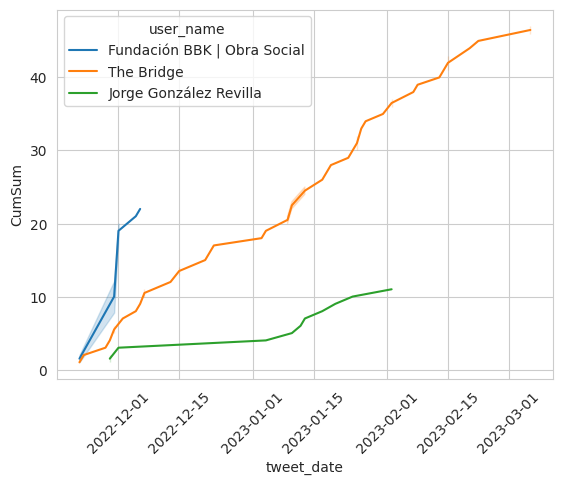

In [20]:
sns.lineplot(data = to_plot_top_mentions, x = 'tweet_date', y = 'CumSum', hue = 'user_name')
plt.xticks(rotation = 45);

#### So The Bridge mentions itself the most with consistent tweets across the time period of interest. Two other users mention The Bridge in two very distinct paterns with the Fundación BBK | Obra Social tweeting heavily on one day, during an event they were involved in while Jorge González Revilla tweeted over a much longer period, but less times in total.

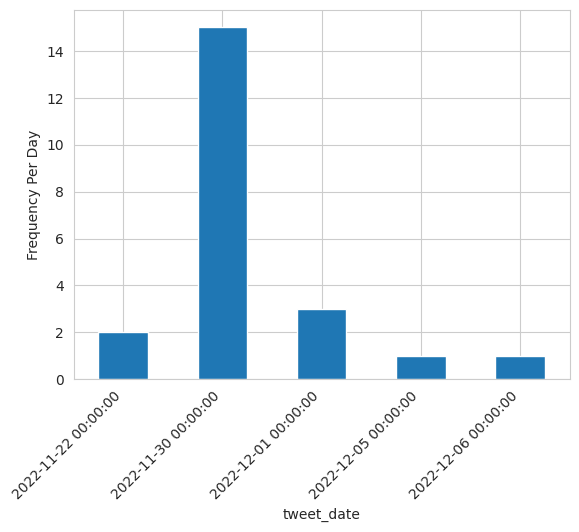

In [21]:
tweets[tweets['user_username'] == 'BBK_eus'].sort_values(by = 'tweet_date').groupby('tweet_date')['user_name'].count().plot(kind = 'bar')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Frequency Per Day');

## In which month were the tweets most heavily concentrated?

In [22]:
month_dict = {'Jan': 3, 'Feb': 4, 'Mar': 5, 'Apr': 6, 'May': 7, 'Jun': 8, 'Jul': 9, 'Aug': 10, 'Sep': 11, 'Oct': 12, 'Nov': 1, 'Dec': 2}

In [23]:
tweets['month_num'] = tweets['month'].map(month_dict)

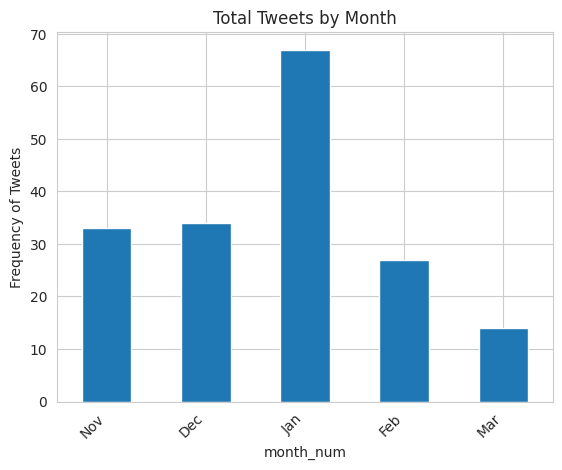

In [47]:
tweets.groupby('month_num', as_index = False)['tweet_event'].count().sort_values(by = 'month_num').plot(kind = 'bar', x = 'month_num', legend = False)
plt.xticks(rotation = 45, ha = 'right', ticks = [0, 1, 2, 3, 4], labels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
plt.ylabel("Frequency of Tweets")
plt.title("Total Tweets by Month");

In [51]:
tweets[tweets['tweet_date'] == '2023-01-18']

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,month,tweet_event,Total_Social_Impact,month_num
141,1615824135321526278,@Recuenco @Godivaciones @ae_bm @TheBridge_Tech...,2023-01-18,866742930,Víctor 📖🐁,nudpiedo,0,2,3,0,Jan,True,5,3
142,1615809886566363136,@Godivaciones @ae_bm @TheBridge_Tech @ddamasd ...,2023-01-18,7154412,Javier G. Recuenco,Recuenco,0,1,2,0,Jan,True,3,3
143,1615807528398426126,@Recuenco @ae_bm @TheBridge_Tech @ddamasd Una ...,2023-01-18,17287251,María Blanco #Putin Иди домой.,Godivaciones,0,2,3,0,Jan,True,5,3
144,1615804903854641156,@Recuenco @ae_bm @TheBridge_Tech @ddamasd ✌️,2023-01-18,17287251,María Blanco #Putin Иди домой.,Godivaciones,0,0,1,0,Jan,True,1,3
145,1615803069970714637,@ae_bm @Godivaciones @TheBridge_Tech @ddamasd ...,2023-01-18,7154412,Javier G. Recuenco,Recuenco,0,2,1,0,Jan,True,3,3
146,1615792007909199872,@Godivaciones @Recuenco @TheBridge_Tech @ddama...,2023-01-18,141272779,aebm,ae_bm,0,1,2,0,Jan,True,3,3
140,1615827851596505095,@nudpiedo @Godivaciones @ae_bm @TheBridge_Tech...,2023-01-18,7154412,Javier G. Recuenco,Recuenco,1,0,4,0,Jan,True,5,3
148,1615786531943235599,@Godivaciones @Recuenco @TheBridge_Tech @ddama...,2023-01-18,417307513,Popmart,Popmart_u2,0,0,2,0,Jan,True,2,3
155,1615630477360267264,Si te mola el #código y no sabes por dónde emp...,2023-01-18,1162694149956603904,The Bridge,TheBridge_Tech,1,0,0,0,Jan,True,1,3
154,1615758687330791424,"@TheBridge_Tech Hola, estoy intentando entrar ...",2023-01-18,1232105203,Adrián Méndez,adriskou,0,0,0,0,Jan,True,0,3


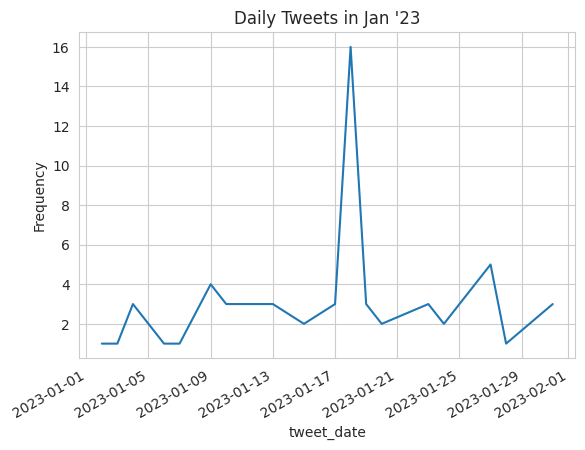

In [46]:
tweets[tweets['month'] == 'Jan'].groupby('tweet_date', as_index = False)['tweet_event'].sum().plot(x = 'tweet_date', legend = False)
plt.title("Daily Tweets in Jan '23")
plt.ylabel("Frequency");

## Which words are most frequent?

In [25]:
all_tweets = [tweet.split() for tweet in tweets['tweet_text'].values]

In [26]:
from nltk.corpus import stopwords
spanish_stop_words = stopwords.words('spanish')

In [27]:
count_dict = {}

for tweet in all_tweets:
    for word in tweet:
        #if word not in spanish_stop_words:
            if word in count_dict:
                count_dict[word] += 1
            else:
                count_dict[word] = 1

In [28]:
pd.DataFrame(count_dict.items(), columns = ['word', 'freq']).sort_values(by = 'freq', ascending = False).head(10)

,word,freq
27,de,269
7,en,150
14,@TheBridge_Tech,118
25,y,107
130,la,105
8,el,95
80,a,93
13,con,60
503,que,47
2,las,45


## What correlations are there between the public metrics (retweets, replies, quotes and likes)?

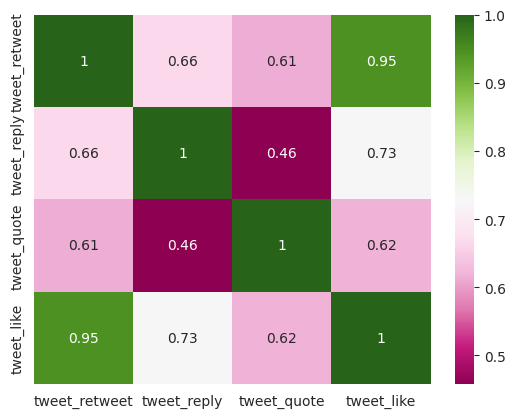

In [29]:
sns.heatmap(tweets[['tweet_retweet', 'tweet_reply', 'tweet_quote', 'tweet_like']].corr(), 
            annot = True, cmap = 'PiYG');

#### We see that in general likes and retweets are very highly correlated while tweet reply and tweet quote show the lowest, but still relatively high, correlation

## Extra Insights?

throw in some extra things here